In [1]:
from emoji_playground import *
from PIL import Image
import matplotlib.pyplot as plt
import requests
plt.rcParams['figure.dpi'] = 150  

def show(img , cmap = "gray"):
    plt.imshow(img , cmap)
    plt.axis("off")

In [2]:
current_emoji = "🐶"
current_filter_name = current_filter_name 

emoji_code = "-".join(f"{ord(c):x}" for c in current_emoji).upper()
url = f"https://raw.githubusercontent.com/hfg-gmuend/openmoji/master/color/618x618/{emoji_code}.png"
emoji_data = Image.open(requests.get(url, stream=True).raw)
emoji_data = np.array(emoji_data.convert("RGBA")) 


/Users/jan-hendrik/projects/pyscript-emoji-skimage/emoji_skimage_env/lib/python3.10/site-packages/skimage/transform/radon_transform.py:75: UserWarning: Radon transform: image must be zero outside the reconstruction circle
  warn('Radon transform: image must be zero outside the '


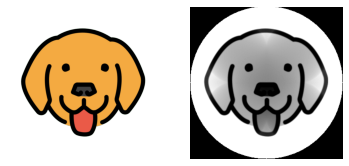

In [3]:
current_filter_name ='radon_iradon'
plt.subplot(1,2,1)
show(emoji_data)

plt.subplot(1,2,2)
filtered_image = filter_names[current_filter_name](emoji_data)
show(filtered_image)

/Users/jan-hendrik/projects/pyscript-emoji-skimage/emoji_skimage_env/lib/python3.10/site-packages/skimage/transform/radon_transform.py:75: UserWarning: Radon transform: image must be zero outside the reconstruction circle
  warn('Radon transform: image must be zero outside the '


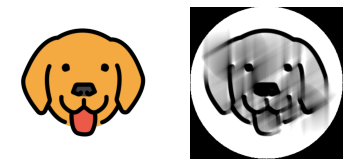

In [3]:
current_filter_name ='radon_iradon_missing'
plt.subplot(1,2,1)
show(emoji_data)

plt.subplot(1,2,2)
filtered_image = filter_names[current_filter_name](emoji_data)
show(filtered_image)